<a href="https://colab.research.google.com/github/dipansh-girdhar/Projects-Assignments---Data-Science-Analytics/blob/master/Telcom_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Data


In [0]:
import numpy as np 
import pandas as pd 

import os
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline

import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/INSAID TASK/Churn.csv"
telcom=pd.read_csv(path)

## Understanding the data

In [0]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
telcom.shape

(7043, 21)

In [0]:
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
telcom.isin([' ']).sum(axis=0)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Data manipulation

In [0]:
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

In [0]:
#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_above_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [0]:
import math
telcom['MonthlyCharges'] = telcom['MonthlyCharges'].apply(lambda x: math.floor(x/20))
telcom['tenure'] = telcom['tenure'].apply(lambda x: math.floor(x/10))

telcom['TotalCharges'] = pd.to_numeric(telcom['TotalCharges'], errors='coerce')
telcom['TotalCharges'] = telcom['TotalCharges'].fillna(np.mean(telcom['TotalCharges']))
telcom['TotalCharges'] = telcom['TotalCharges'].apply(lambda x: math.floor(x/1000))

## Data Visualization

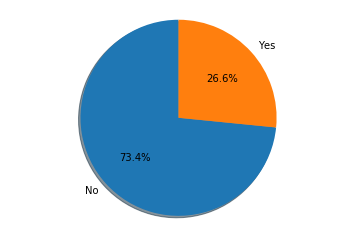

In [0]:

dep=dict(telcom.loc[:, 'Churn'].value_counts())
fig1, ax1 = plt.subplots()
ax1.pie(list(dep.values()), labels=list(dep.keys()), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

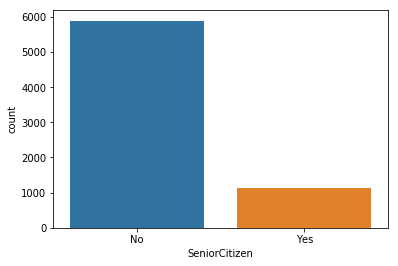

In [0]:
sns.countplot(x = "SeniorCitizen", data = telcom)
telcom.loc[:, 'SeniorCitizen'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

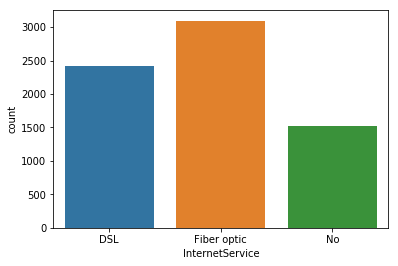

In [0]:
sns.countplot(x = "InternetService", data = telcom)
telcom.loc[:, 'InternetService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

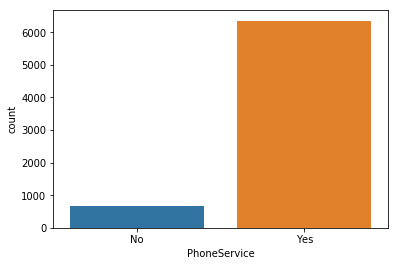

In [0]:
sns.countplot(x = "PhoneService", data = telcom)
telcom.loc[:, 'PhoneService'].value_counts()

In [0]:
def piech(dep):
    fig1, ax1 = plt.subplots()
    ax1.pie(list(dep.values()), labels=list(dep.keys()), autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  

    plt.show()



gender Distribution for Churned Customers:


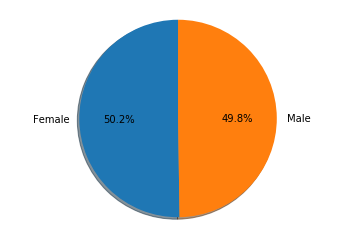

gender Distribution for Non-Churned Customers:


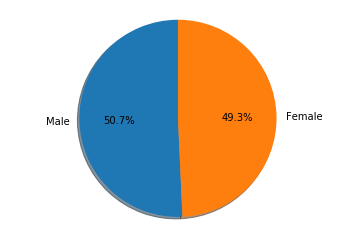



SeniorCitizen Distribution for Churned Customers:


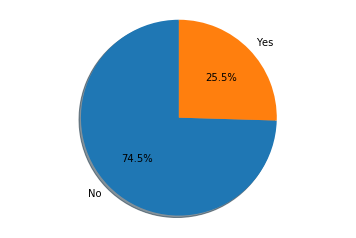

SeniorCitizen Distribution for Non-Churned Customers:


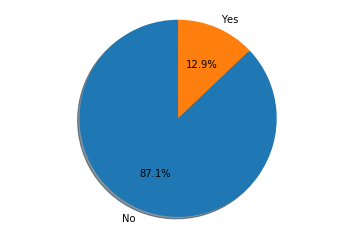



Partner Distribution for Churned Customers:


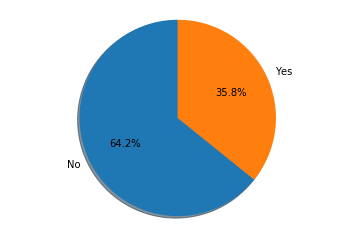

Partner Distribution for Non-Churned Customers:


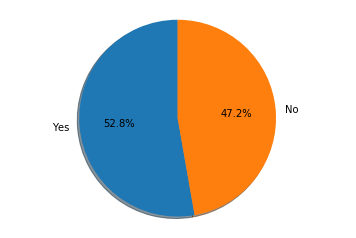



Dependents Distribution for Churned Customers:


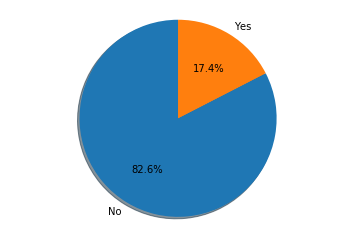

Dependents Distribution for Non-Churned Customers:


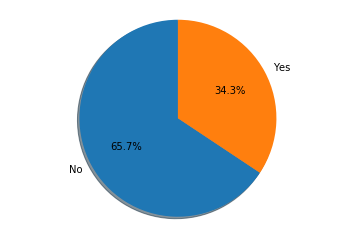



PhoneService Distribution for Churned Customers:


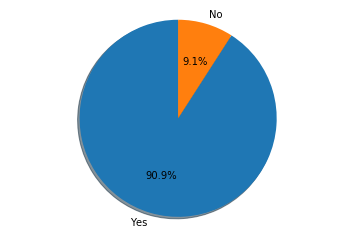

PhoneService Distribution for Non-Churned Customers:


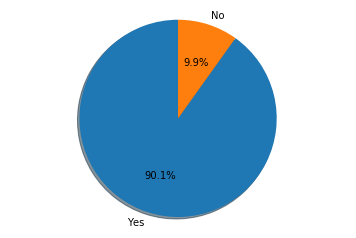



MultipleLines Distribution for Churned Customers:


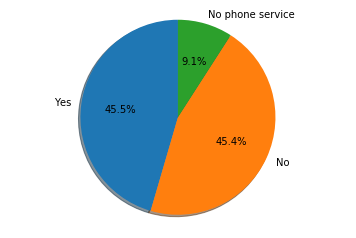

MultipleLines Distribution for Non-Churned Customers:


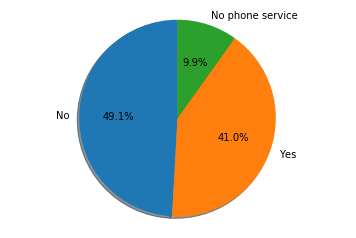



InternetService Distribution for Churned Customers:


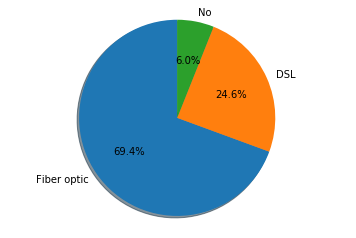

InternetService Distribution for Non-Churned Customers:


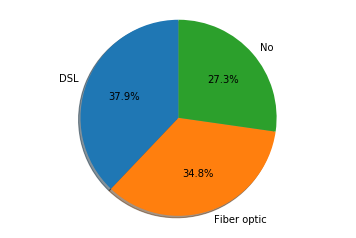



OnlineSecurity Distribution for Churned Customers:


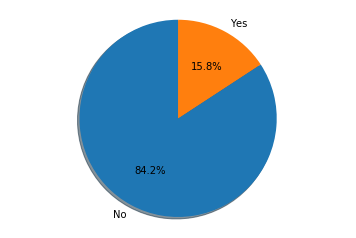

OnlineSecurity Distribution for Non-Churned Customers:


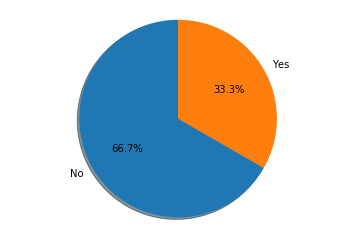



OnlineBackup Distribution for Churned Customers:


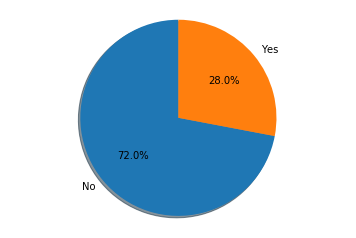

OnlineBackup Distribution for Non-Churned Customers:


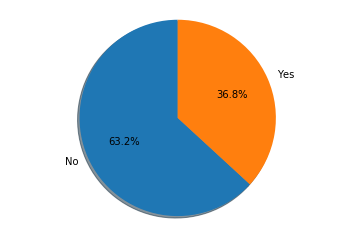



DeviceProtection Distribution for Churned Customers:


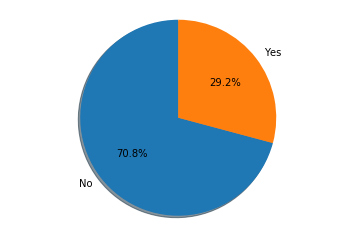

DeviceProtection Distribution for Non-Churned Customers:


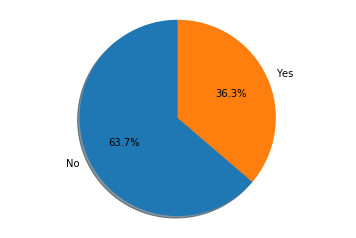



TechSupport Distribution for Churned Customers:


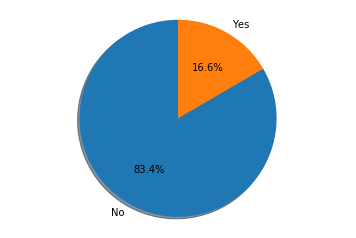

TechSupport Distribution for Non-Churned Customers:


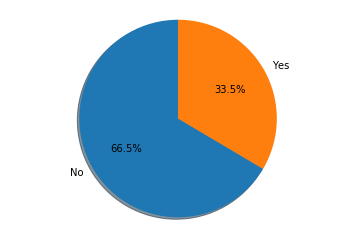



StreamingTV Distribution for Churned Customers:


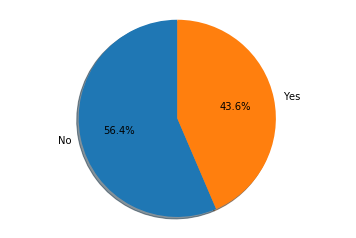

StreamingTV Distribution for Non-Churned Customers:


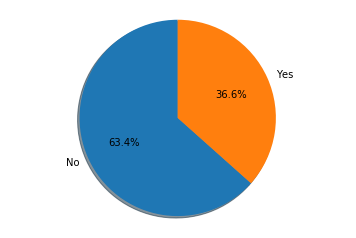



StreamingMovies Distribution for Churned Customers:


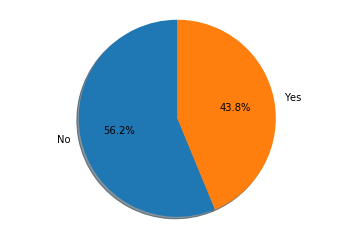

StreamingMovies Distribution for Non-Churned Customers:


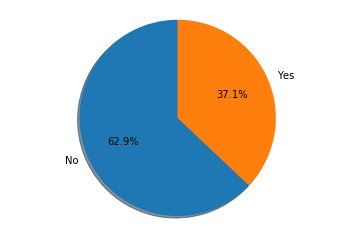



Contract Distribution for Churned Customers:


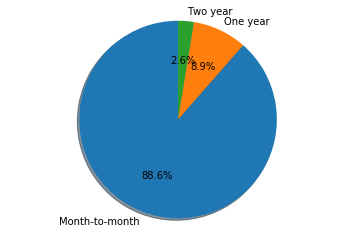

Contract Distribution for Non-Churned Customers:


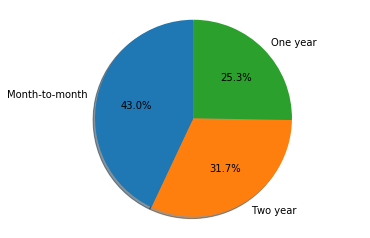



PaperlessBilling Distribution for Churned Customers:


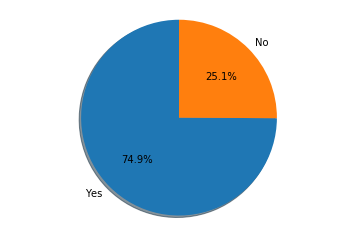

PaperlessBilling Distribution for Non-Churned Customers:


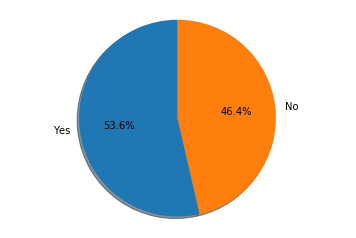



PaymentMethod Distribution for Churned Customers:


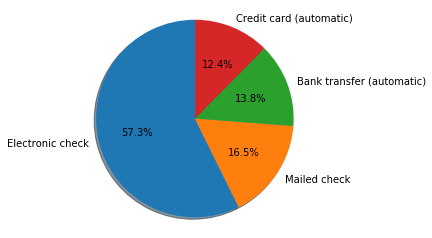

PaymentMethod Distribution for Non-Churned Customers:


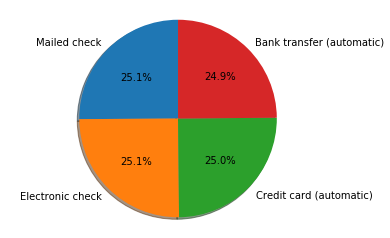



tenure_group Distribution for Churned Customers:


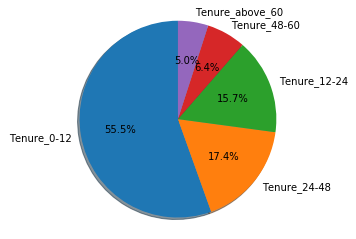

tenure_group Distribution for Non-Churned Customers:


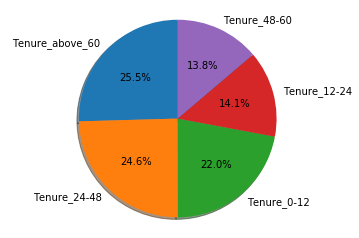

In [0]:
for i in cat_cols :
    dep=dict(telcom[i][telcom['Churn']=="Yes"].value_counts())
    print("\n\n" + i + " Distribution for Churned Customers:")
    piech(dep)
    dep=dict(telcom[i][telcom['Churn']=="No"].value_counts())
    print(i + " Distribution for Non-Churned Customers:")
    piech(dep)

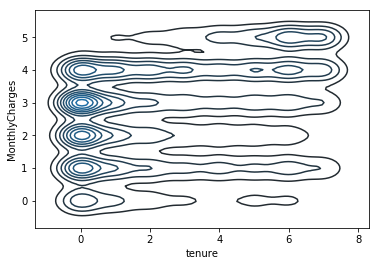

In [0]:
sns.kdeplot(telcom['tenure'], telcom['MonthlyCharges'])

## Data Preprocessing

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [0]:
telcom = telcom.drop("customerID", axis=1)
y = telcom['Churn']
telcom = telcom.drop("Churn", axis=1)
encoded = telcom.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,2,1,0,0
1,1,0,0,0,3,1,0,0,1,0,1,0,0,0,1,0,3,2,1,2
2,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,2,0,0
3,1,0,0,0,4,0,1,0,1,0,1,1,0,0,1,0,0,2,1,2
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,3,0,0


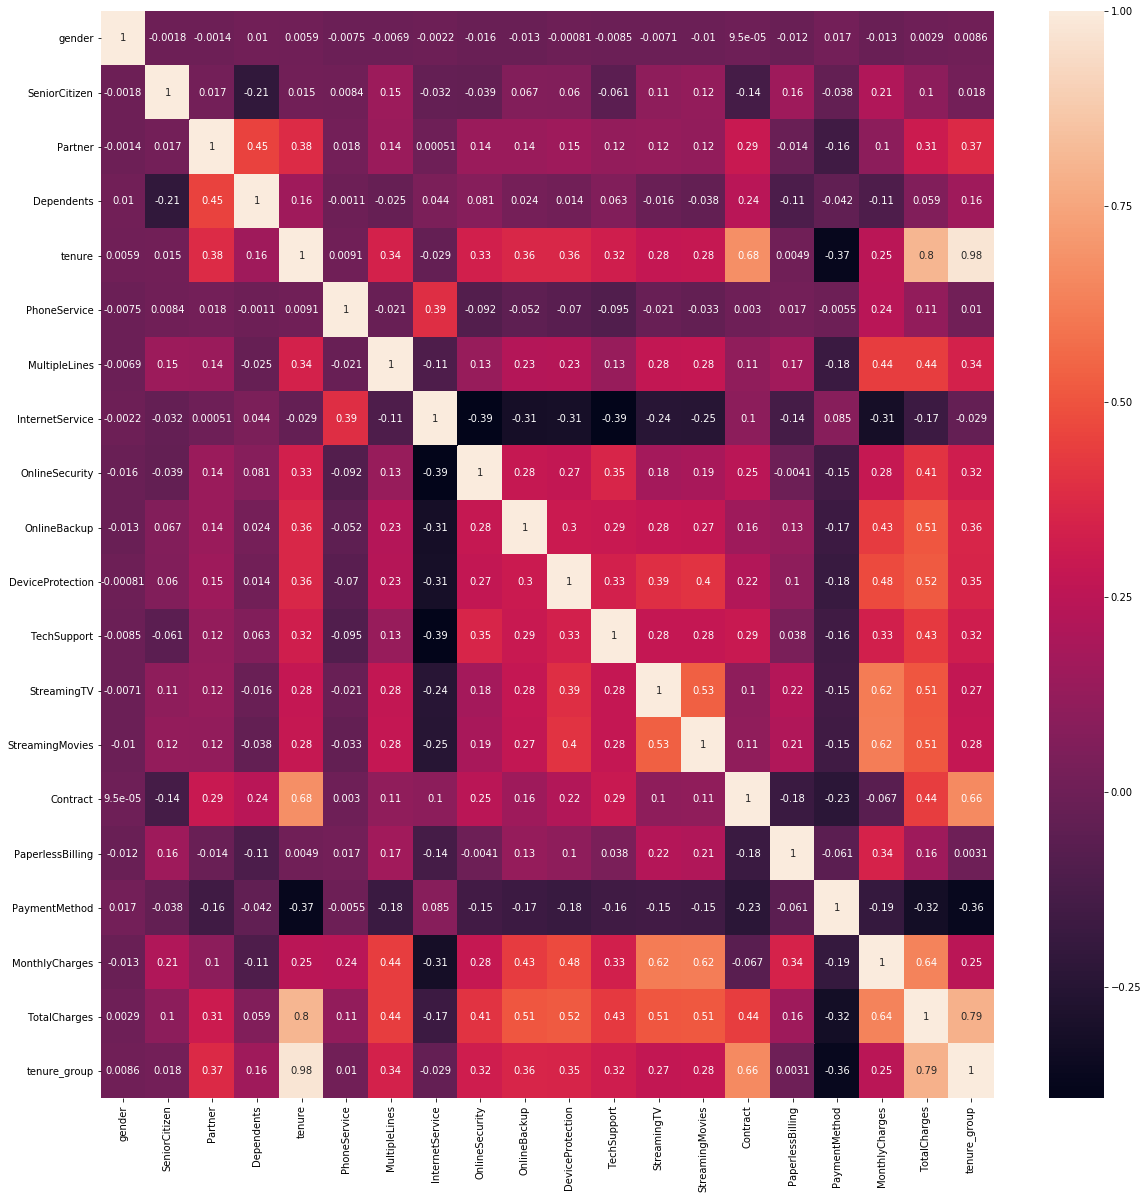

In [0]:
plt.figure(figsize =(20,20))
Corr=encoded[encoded.columns].corr()
sns.heatmap(Corr,annot=True)

In [0]:
y = LabelEncoder().fit_transform(y)

In [0]:
len(y)

7032

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded, y, test_size = 3032/7032)

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve

In [0]:
y_xgbc = xgb.predict(X_test)
# predicting Confusion matrix, accuracy score,precision score, recall score
print('accuracy_score of xgboost: ', accuracy_score(y_test, y_xgbc))
print('confusion_matrix of xgboost: ', confusion_matrix(y_test, y_xgbc))
print('precision_score of xgboost: ', precision_score(y_test, y_xgbc))
print('recall_score of xgboost: ', recall_score(y_test, y_xgbc))
print('precision_recall_curve of xgboost: ', precision_recall_curve(y_test, y_xgbc))

accuracy_score of xgboost:  0.7948548812664907
confusion_matrix of xgboost:  [[1955  266]
 [ 356  455]]
precision_score of xgboost:  0.6310679611650486
recall_score of xgboost:  0.561035758323058
precision_recall_curve of xgboost:  (array([0.26748021, 0.63106796, 1.        ]), array([1.        , 0.56103576, 0.        ]), array([0, 1]))


In [0]:
importance=xgb.get_booster().get_score(importance_type='weight')

In [0]:
importance

{'Contract': 88,
 'Dependents': 9,
 'DeviceProtection': 6,
 'InternetService': 51,
 'MonthlyCharges': 85,
 'MultipleLines': 29,
 'OnlineBackup': 25,
 'OnlineSecurity': 23,
 'PaperlessBilling': 32,
 'Partner': 11,
 'PaymentMethod': 42,
 'PhoneService': 5,
 'SeniorCitizen': 18,
 'StreamingMovies': 25,
 'StreamingTV': 27,
 'TechSupport': 32,
 'TotalCharges': 46,
 'gender': 31,
 'tenure': 94,
 'tenure_group': 10}

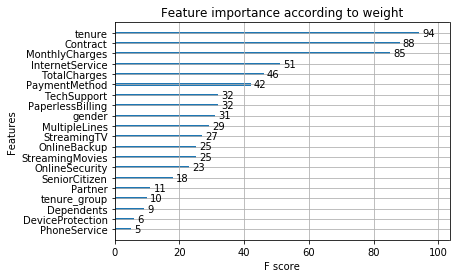

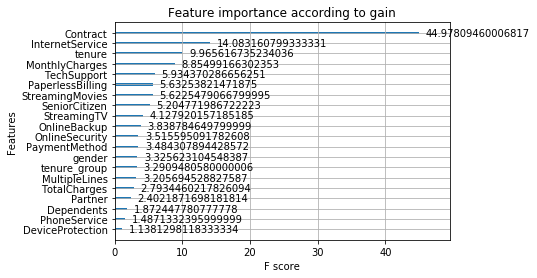

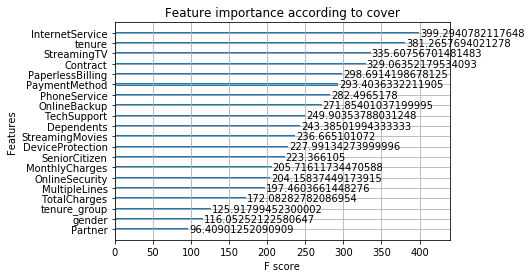

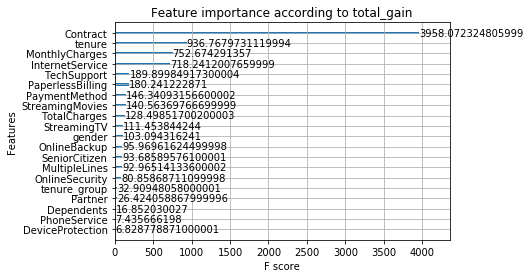

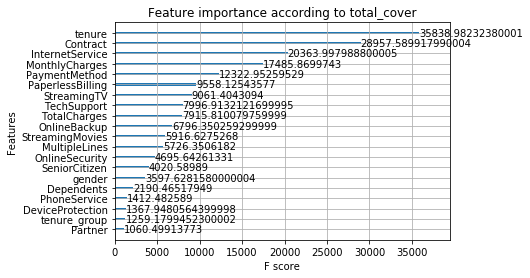

In [0]:
from xgboost import plot_importance
importance_type = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
for i in importance_type:
    plot_importance(xgb,title="Feature importance according to "+ i,importance_type=i)

The Coverage metric means the relative number of observations related to this feature. For example, if you have 100 observations, 4 features and 3 trees, and suppose feature1 is used to decide the leaf node for 10, 5, and 2 observations in tree1, tree2 and tree3 respectively; then the metric will count cover for this feature as 10+5+2 = 17 observations. This will be calculated for all the 4 features and the cover will be 17 expressed as a percentage for all features’ cover metrics.

The Gain implies the relative contribution of the corresponding feature to the model calculated by taking each feature’s contribution for each tree in the model. A higher value of this metric when compared to another feature implies it is more important for generating a prediction.

The Frequency (R)/Weight (python) is the percentage representing the relative number of times a particular feature occurs in the trees of the model. In the above example, if feature1 occurred in 2 splits, 1 split and 3 splits in each of tree1, tree2 and tree3; then the weight for feature1 will be 2+1+3 = 6. The frequency for feature1 is calculated as its percentage weight over weights of all features.

‘Gain’ is the improvement in accuracy brought by a feature to the branches it is on. The idea is that before adding a new split on a feature X to the branch there was some wrongly classified elements, after adding the split on this feature, there are two new branches, and each of these branch is more accurate (one branch saying if your observation is on this branch then it should be classified as 1, and the other branch saying the exact opposite).

The Gain is the most relevant attribute to interpret the relative importance of each feature.

#### The importances are in line with our previous analysis. The three numerical features are good predictors for churn, specially tenure and contract. As we've seen, customers with Fiber optic are very likely to churn, while those with long term contracts are not. On the other hand, gender and streaming are not important features and It might be interesting to drop additional services with the label 'No internet service', since they are highly correlated.